In [166]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [168]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio

## Step 1 : Loading and Clening Data

In [169]:
df=pd.read_csv("day.csv")
df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [170]:
## Dropping Unnecessary Columns
df.drop(["instant","casual","registered"],axis = 1,inplace=True)

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
dteday        730 non-null object
season        730 non-null object
yr            730 non-null object
mnth          730 non-null object
holiday       730 non-null object
weekday       730 non-null object
workingday    730 non-null object
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(1), object(8)
memory usage: 74.3+ KB


In [175]:
df.describe()

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


In [176]:
## Converting Data Type of Catagorical Variable.
df['season']=df['season'].astype(object)
df['yr']=df['yr'].astype(object)
df['mnth']=df['mnth'].astype(object)
df['holiday']=df['holiday'].astype(object)
df['weekday']=df['weekday'].astype(object)
df['workingday']=df['workingday'].astype(object)
df['weathersit']=df['weathersit'].astype(object)

## Step 2 : Data Visulization and EDA

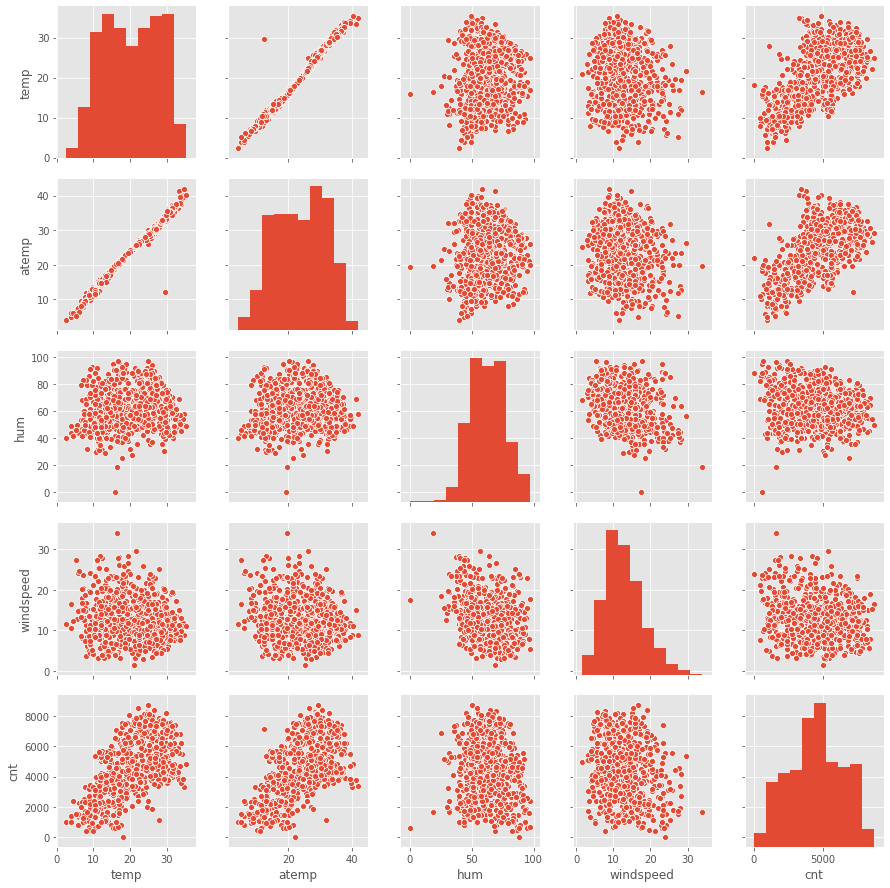

In [177]:
## Visulizing Data

sns.pairplot(df[['temp','atemp','hum','windspeed','cnt']])
plt.show()

## Using PLotly
##fig=px.scatter_matrix(df,dimensions=['temp','atemp','hum','windspeed','cnt'])
##fig.show()

From above Graph we can See that , atemp and temp Variable are Highly corelated...
We can remove one of them

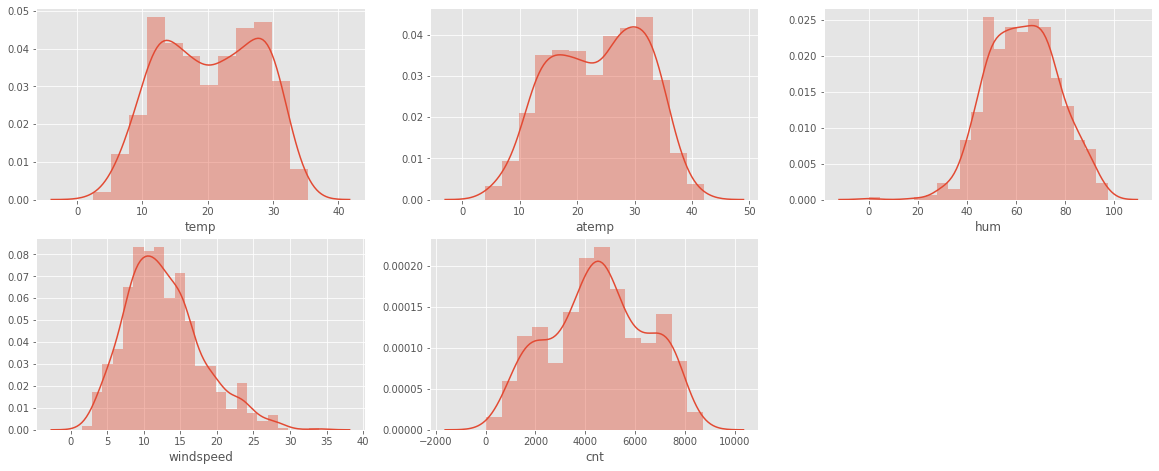

In [178]:
## Using Plotly
#fig=px.histogram(data_frame=df,x="cnt",
#           title='Distribution of Count',histnorm='density')
#fig.show()


plt.figure(figsize=(20, 12))

plt.subplot(3,3,1)
#df.temp.plot.hist()
sns.distplot(df.temp)

plt.subplot(3,3,2)
#df.atemp.plot.hist()
sns.distplot(df.atemp)

plt.subplot(3,3,3)
#df.hum.plot.hist()
sns.distplot(df.hum)

plt.subplot(3,3,4)
#df.windspeed.plot.hist()
sns.distplot(df.windspeed)

plt.subplot(3,3,5)
#df.cnt.plot.hist()
sns.distplot(df.cnt)

Counnt Is normally Distributed so Linear Regression can be applied

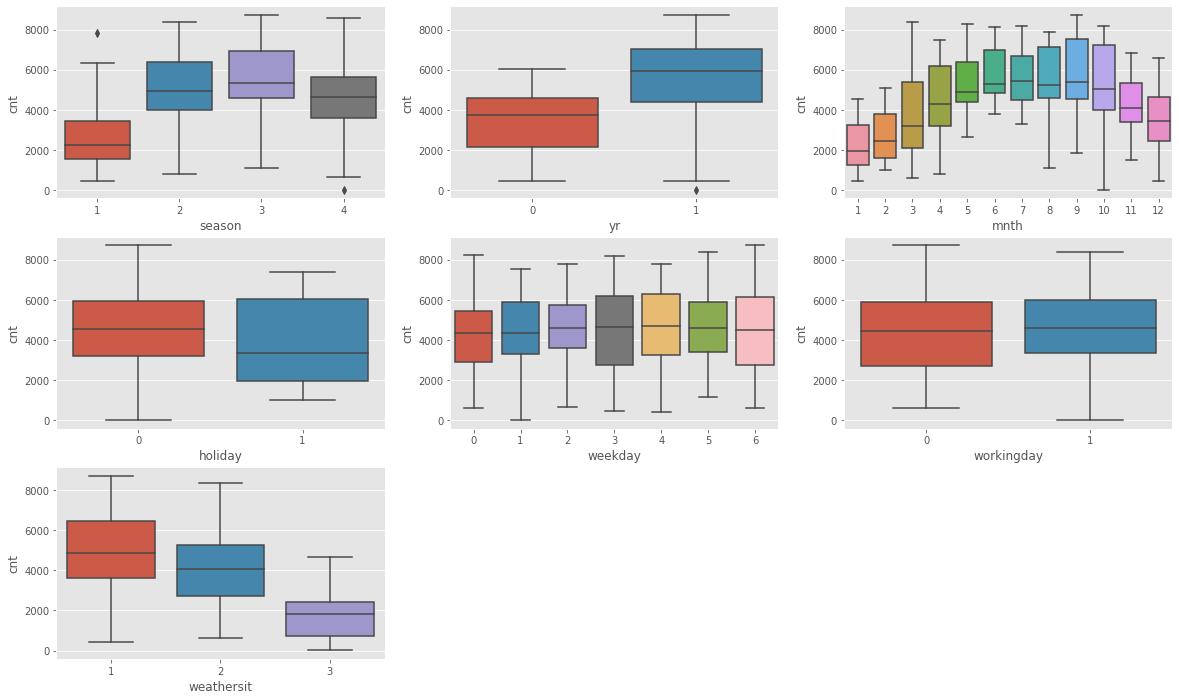

In [179]:
### Box PLots Using Seaborm
plt.figure(figsize=(20, 12))

plt.subplot(3,3,1)
sns.boxplot(y=df.cnt,x=df.season)

plt.subplot(3,3,2)
sns.boxplot(y=df.cnt,x=df.yr)

plt.subplot(3,3,3)
sns.boxplot(y=df.cnt,x=df.mnth)

plt.subplot(3,3,4)
sns.boxplot(y=df.cnt,x=df.holiday)

plt.subplot(3,3,5)
sns.boxplot(y=df.cnt,x=df.weekday)

plt.subplot(3,3,6)
sns.boxplot(y=df.cnt,x=df.workingday)

plt.subplot(3,3,7)
sns.boxplot(y=df.cnt,x=df.weathersit)

In [180]:
## Using Plotly
fig1=px.box(df,y="cnt",x="season",notched=True,color="season",template="ggplot2")
fig2=px.box(df,y="cnt",x="mnth",notched=True,color="mnth",template="ggplot2")
fig3=px.box(df,y="cnt",x="holiday",notched=True,color="holiday",facet_col='weathersit',template="ggplot2")
fig4=px.box(df,y="cnt",x="weekday",notched=True,color="weekday",template="ggplot2")
fig5=px.box(df,y="cnt",x="workingday",notched=True,color="workingday",template="ggplot2")
fig6=px.box(df,y="cnt",x="weathersit",notched=True,color="weathersit",template="ggplot2")
fig1.show()
fig2.show()
fig3.show()
fig4.show()
fig5.show()
fig6.show()

From Box plot following observation can be made
1. Season : Count Rises in Season 2(Summer) and 3(Falls)
2. Month : Highest Max. Count is in month 9 . Max. Count for Month 3 is also close to month 9 but Average Count is much lower than month 3
3. Holida : On holiday less people are renting biks even if weather is good
4. Weekday : Average Remains alsmost same in all days
5. More people are taking bike in season : 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
6. More Count in Year 2019

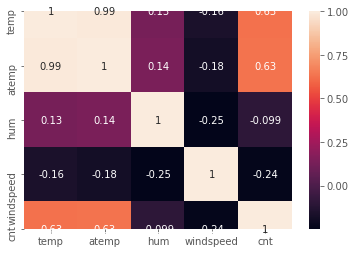

In [181]:
## Checking DEnsity plot of Correlation matrix
sns.heatmap(df.corr(),annot=True)

## Using Plotly
#plot the correlation matrix of salary, balance and age in inp1 dataframe.
#fig = px.imshow(df.corr(),template="ggplot2")
#fig.show()

From Above Graph we can see that atemp and Temp are highly corr.
We can Drop it after VIF acore

In [182]:
## Creating Bar Graph of Hoidays
px.bar(df,x=df.season,y=df.cnt)

## Step 3: Data preparation

In [183]:
## Season Column Dummy
seasonDummy=pd.get_dummies(df['season'],prefix='season',drop_first = True)
seasonDummy.rename(columns={'season_2':'summer_season',
                            'season_3':'fall_season',
                            'season_4':'winter_season'},inplace=True)
# 1 = spring, 2 = summer, 3 = fall, 4 = winter

df1 = pd.concat([df, seasonDummy], axis = 1)
df1.drop(["dteday","season"],axis=1,inplace=True)
df1.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer_season,fall_season,winter_season
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


In [184]:
## mnth Column Dummy
mnthDummy=pd.get_dummies(df1['mnth'],prefix='mnth',drop_first = True)
mnthDummy.rename(columns={'mnth_2':'mnth_Feb',
                          'mnth_3':'mnth_Mar',
                          'mnth_4':'mnth_Apr',
                          'mnth_5':'mnth_May',
                          'mnth_6':'mnth_June',
                          'mnth_7':'mnth_Jul',
                          'mnth_8':'mnth_Aug',
                          'mnth_9':'mnth_Sep',
                          'mnth_10':'mnth_Oct',
                          'mnth_11':'mnth_Nov',
                          'mnth_12':'mnth_Dec',},inplace=True)
df1 = pd.concat([df1, mnthDummy], axis = 1)
df1.drop(["mnth"],axis=1,inplace=True)
df1.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,mnth_Mar,mnth_Apr,mnth_May,mnth_June,mnth_Jul,mnth_Aug,mnth_Sep,mnth_Oct,mnth_Nov,mnth_Dec
0,0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0


In [185]:
## weekday Column Dummy
weekdayDummy=pd.get_dummies(df1['weekday'],prefix='weekday',drop_first = True)
weekdayDummy.rename(columns={'weekday_1':'day_Monday',
                          'weekday_2':'day_Tuesday',
                          'weekday_3':'day_Wednesday',
                          'weekday_4':'day_Thrushday',
                          'weekday_5':'day_Friday',
                          'weekday_6':'day_Saturdat'},inplace=True)
df1 = pd.concat([df1, weekdayDummy], axis = 1)
df1.drop(["weekday"],axis=1,inplace=True)
df1.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer_season,...,mnth_Sep,mnth_Oct,mnth_Nov,mnth_Dec,day_Monday,day_Tuesday,day_Wednesday,day_Thrushday,day_Friday,day_Saturdat
0,0,0,0,2,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,0,0,0,0,1,0,0,0


In [186]:
## weathersit
weathersit=pd.get_dummies(df1['weathersit'],prefix='weathersit',drop_first = True)
df1 = pd.concat([df1, weathersit], axis = 1)
df1.drop(["weathersit"],axis=1,inplace=True)
df1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer_season,fall_season,...,mnth_Nov,mnth_Dec,day_Monday,day_Tuesday,day_Wednesday,day_Thrushday,day_Friday,day_Saturdat,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


In [190]:
## Converting all varialbe in Float .. Linear Regression can not be performed in Object Datatype
df1=df1.astype(float)
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
yr               730 non-null float64
holiday          730 non-null float64
workingday       730 non-null float64
temp             730 non-null float64
atemp            730 non-null float64
hum              730 non-null float64
windspeed        730 non-null float64
cnt              730 non-null float64
summer_season    730 non-null float64
fall_season      730 non-null float64
winter_season    730 non-null float64
mnth_Feb         730 non-null float64
mnth_Mar         730 non-null float64
mnth_Apr         730 non-null float64
mnth_May         730 non-null float64
mnth_June        730 non-null float64
mnth_Jul         730 non-null float64
mnth_Aug         730 non-null float64
mnth_Sep         730 non-null float64
mnth_Oct         730 non-null float64
mnth_Nov         730 non-null float64
mnth_Dec         730 non-null float64
day_Monday       730 non-null float64
day_Tuesday      730 

## Step 4: Splitting data into Test and Training set

In [191]:
np.random.seed(0)
df_train, df_test = train_test_split(df1, train_size = 0.7, test_size = 0.3, random_state = 100)

In [192]:
## Scaling the data using min-max scaler
scaler = MinMaxScaler()
# applying scaling to all numerical variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer_season,fall_season,...,mnth_Nov,mnth_Dec,day_Monday,day_Tuesday,day_Wednesday,day_Thrushday,day_Friday,day_Saturdat,weathersit_2,weathersit_3
653,1.0,0.0,1.0,0.509887,0.501133,0.575354,0.300794,0.864243,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
576,1.0,0.0,1.0,0.815169,0.766351,0.725633,0.264686,0.827658,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
426,1.0,0.0,0.0,0.442393,0.438975,0.640189,0.255342,0.465255,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
728,1.0,0.0,0.0,0.245101,0.200348,0.498067,0.663106,0.204096,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
482,1.0,0.0,0.0,0.395666,0.391735,0.504508,0.188475,0.482973,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


## Step 5: Model Training

In [193]:
## Seperating dependent anf Indepedent Variable
y_train = df_train.pop('cnt')
X_train = df_train

In [194]:
# Running RFE with the output number of the variable equal to 15
# Recursice Feature Elimination -  This the automatic technic. for Selecting Feture
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [195]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer_season', True, 1),
 ('fall_season', True, 1),
 ('winter_season', True, 1),
 ('mnth_Feb', False, 7),
 ('mnth_Mar', False, 2),
 ('mnth_Apr', False, 4),
 ('mnth_May', False, 3),
 ('mnth_June', False, 5),
 ('mnth_Jul', False, 8),
 ('mnth_Aug', True, 1),
 ('mnth_Sep', True, 1),
 ('mnth_Oct', True, 1),
 ('mnth_Nov', False, 9),
 ('mnth_Dec', False, 10),
 ('day_Monday', False, 11),
 ('day_Tuesday', False, 12),
 ('day_Wednesday', False, 14),
 ('day_Thrushday', False, 15),
 ('day_Friday', False, 13),
 ('day_Saturdat', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [196]:
# Columns selected by RFE
## Storing Column list which are Accepeted by RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'summer_season', 'fall_season', 'winter_season', 'mnth_Aug', 'mnth_Sep',
       'mnth_Oct', 'day_Saturdat', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [197]:
# Columns rejected by RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_Feb', 'mnth_Mar', 'mnth_Apr', 'mnth_May', 'mnth_June',
       'mnth_Jul', 'mnth_Nov', 'mnth_Dec', 'day_Monday', 'day_Tuesday',
       'day_Wednesday', 'day_Thrushday', 'day_Friday'],
      dtype='object')

In [199]:
## Selecting Colums which are selected by RFE
X_train_rfe = X_train[col]

In [200]:
## Creating Dummy column for Intercept
X_train_rfe = sm.add_constant(X_train_rfe)

In [201]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [203]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.7
Date:                Sun, 10 May 2020   Prob (F-statistic):          1.89e-191
Time:                        17:42:14   Log-Likelihood:                 520.09
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1950      0.029      6.791

In Above model Fall_Season , mnth_Oct and Holiday is no Significant

In [211]:
## Now we will Check VIF value
X_train_new = X_train_rfe.drop(['const'], axis=1)
# Calculate the VIFs for the new model
VIF=pd.Series([variance_inflation_factor(X_train_new.values, i) 
               for i in range(X_train_new.shape[1])], 
              index=X_train_new.columns)
print(VIF)

yr               1.942883
holiday          1.107803
workingday       3.876278
windspeed        3.427212
summer_season    1.762938
fall_season      2.955092
winter_season    2.256108
mnth_Aug         1.849588
mnth_Sep         1.493438
mnth_Oct         1.574045
day_Saturdat     1.671677
weathersit_2     1.542097
weathersit_3     1.098262
dtype: float64


In [207]:
# lets's drop Humidity and Create new Model

In [208]:
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.7
Date:                Sun, 10 May 2020   Prob (F-statistic):          1.40e-188
Time:                        17:46:42   Log-Likelihood:                 510.49
No. Observations:                 510   AIC:                            -991.0
Df Residuals:                     495   BIC:                            -927.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1012      0.019      5.239

In [210]:
X_train_rfe = X_train_rfe.drop(['temp'], axis=1)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     136.3
Date:                Sun, 10 May 2020   Prob (F-statistic):          2.59e-154
Time:                        17:47:52   Log-Likelihood:                 426.18
No. Observations:                 510   AIC:                            -824.4
Df Residuals:                     496   BIC:                            -765.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2437      0.019     12.627

## Residual Analysis

In [212]:
# Predicting on trining set
y_train_cnt = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

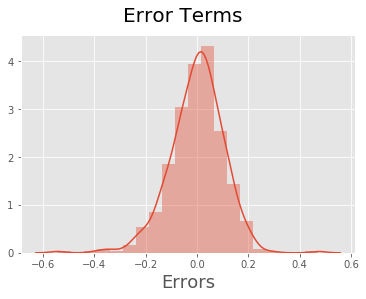

In [213]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Error Seem Normally Distributed

## Step 6: Model Evaluation¶

In [214]:
# Min-Max scalar tranform on test dataset
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [215]:
y_test = df_test.pop('cnt')
X_test = df_test

In [217]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [218]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

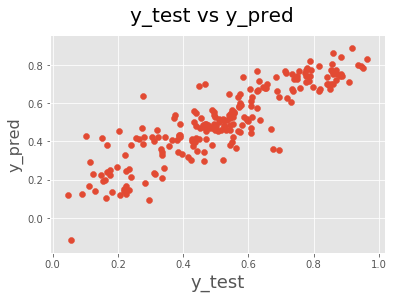

In [219]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [220]:
from sklearn.metrics import r2_score
print (r2_score(y_test, y_pred))

0.7686313928296459
